# Data in 3D - Selecting and Functions

We'll continue working with 3 dimensional datasets and continue using `xarray` to apply _functions_ to our data selections.

We'll start by importing the packages we need and loading the [Berkeley Earth](https://berkeleyearth.org/data/) gridded, global surface temperature dataset.

In [25]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load data
fname_in = '../data/Land_and_Ocean_LatLong1.nc'
DS = xr.open_dataset(fname_in,engine='netcdf4')

In [3]:
# view the dataset
DS

<xarray.Dataset>
Dimensions:      (longitude: 360, latitude: 180, time: 2093, month_number: 12)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) float64 1.85e+03 1.85e+03 ... 2.024e+03 2.024e+03
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 ...
    temperature  (time, latitude, longitude) float32 ...
    climatology  (month_number, latitude, longitude) float32 ...
Attributes:
    Conventions:           Berkeley Earth Internal Convention (based on CF-1.5)
    title:                 Native Format Berkeley Earth Surface Temperature A...
    history:               11-Jul-2024 02:09:01
    institution:           Berkeley Earth Surface Temperature Project
    land_source_history:   08-Jul-2024 10:18:28
    ocean_source_history:  16-Jun-2024 08:23:06
    comment:               This file contains Berkeley Earth surface temperat...

## Selecting a range with `slice`
Let's remind ourselves that climate is a longterm (>30 years) average of conditions on Earth. In the last notebook, we used the `sel` function to look at individual points in time and space. We can also use `sel` to select a range of points to make meaningful subsets of the data.

Let's start by selecting a 30-year chunk of the surface temperature data from 1990-2020. We can select a range by using the `slice` argument on the `time` dimension.

In [6]:
present

<xarray.DataArray 'temperature' (time: 360, latitude: 180, longitude: 360)>
[23328000 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) float64 1.99e+03 1.99e+03 1.99e+03 ... 2.02e+03 2.02e+03
Attributes:
    units:          degree C
    standard_name:  surface_temperature_anomaly
    long_name:      Air Surface Temperature Anomaly
    valid_min:      -20.010550544126346
    valid_max:      25.20734464914045

In [4]:
present = DS['temperature'].sel(time=slice(1990, 2020))

(array([2.3300000e+02, 4.0160000e+03, 7.5739000e+04, 2.2494430e+06,
        1.9666417e+07, 1.1805640e+06, 1.3419300e+05, 1.5447000e+04,
        1.7370000e+03, 1.5400000e+02]),
 array([-16.74636459, -12.72173977,  -8.69711494,  -4.6724906 ,
         -0.64786607,   3.37675858,   7.4013834 ,  11.42600822,
         15.4506321 ,  19.47525787,  23.49988174]),
 <BarContainer object of 10 artists>)

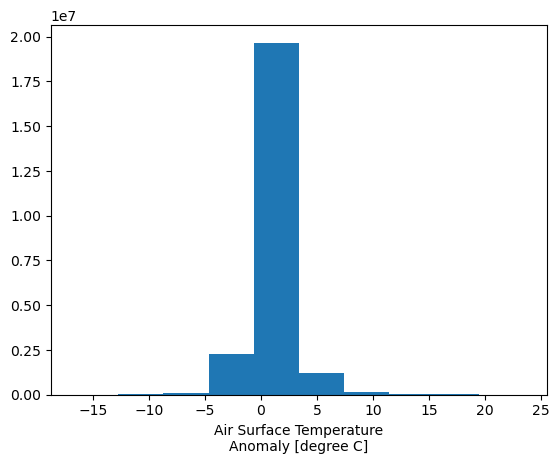

In [5]:
present.plot()

Now we have a new variable, `present` which is the temperature reccord from 1990-2020. It's nice having this data in it's own `DataArray`, but the value of this selection comes from being able to run calculations on the subset.

## Applying built-in functions

Now that we have our subset we can ask questions about the subset of data and use built-in functions to run calculations on that subset. Let's start with a familiar ones, like `mean`, `min`, `max`, `std`.

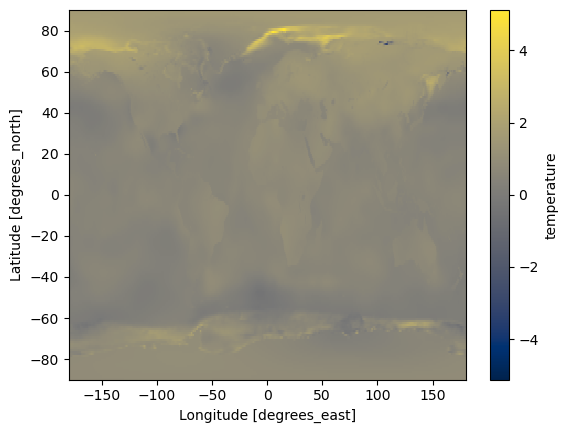

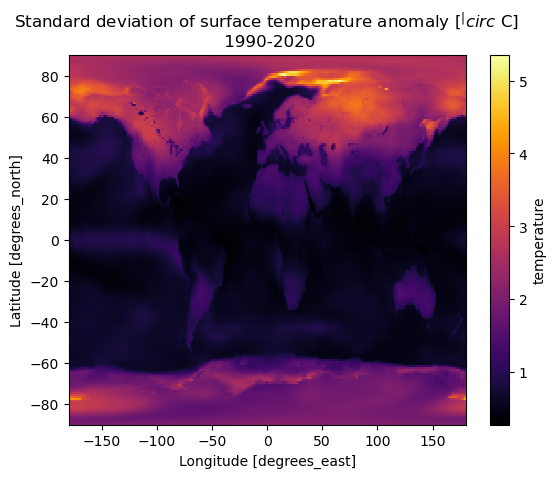

In [27]:
plt.figure(1)
present.mean('time').plot(cmap='cividis')


plt.figure(2)
present.std('time').plot(cmap='inferno')
plt.title(f'Standard deviation of surface temperature anomaly [$^|circ$ C] \n 1990-2020')

plt.show()

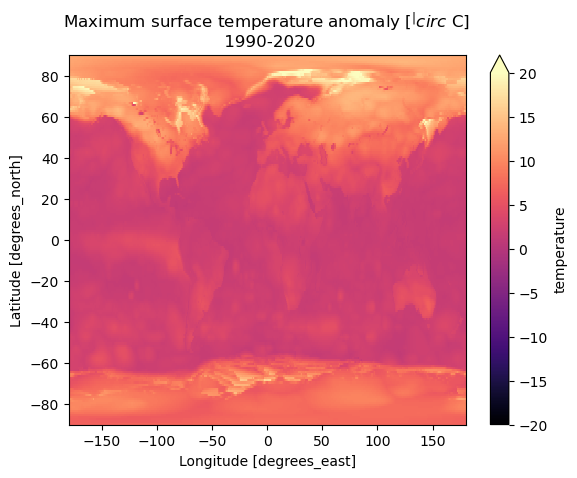

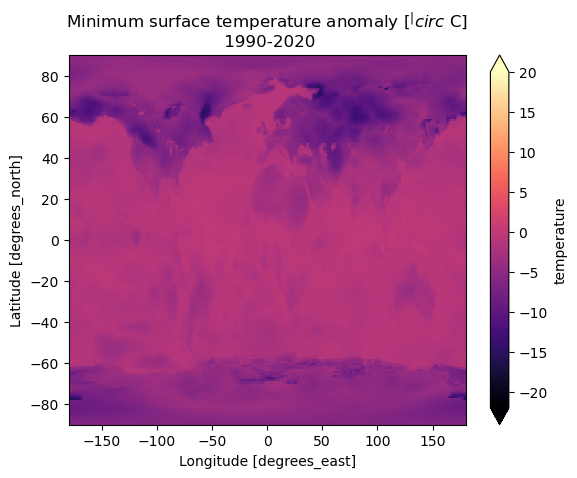

In [24]:
plt.figure(1)
present.max('time').plot(vmin=-20, vmax=20, cmap='magma')
plt.title(f'Maximum surface temperature anomaly [$^|circ$ C] \n 1990-2020')

plt.figure(2)
present.min('time').plot(vmin=20, vmax=-20, cmap='magma')
plt.title(f'Minimum surface temperature anomaly [$^|circ$ C] \n 1990-2020')
plt.show()

plt.show()

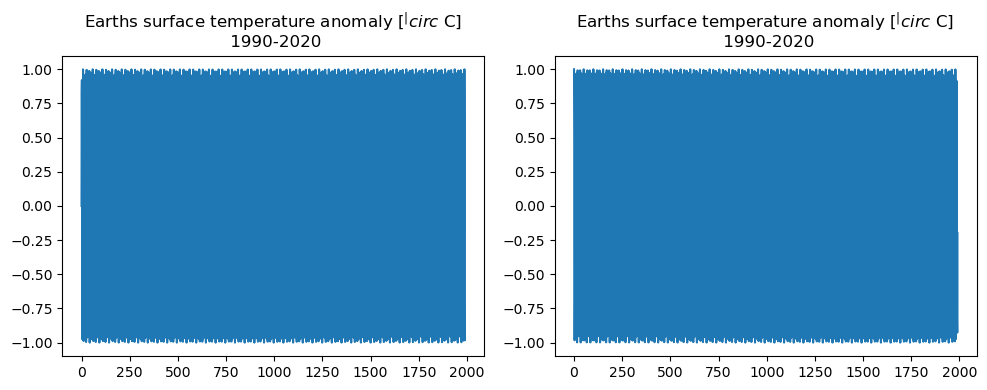

In [39]:
x1 = np.linspace(0, 1990, 2020) 
y1 = np.sin(x1)


x2 = np.linspace(0, 1990, 2020)
y2 = np.cos(x2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(x1, y1)
ax1.set_title('Earths surface temperature anomaly [$^|circ$ C] \n 1990-2020')

# Plot data on the second subplot
ax2.plot(x2, y2)
ax2.set_title('Earths surface temperature anomaly [$^|circ$ C] \n 1990-2020')

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plots
plt.show()

## Quick linear regression

We can also use built-in functions to calculate trends in the temperature reccord within the subset using `polyfit`.

In [32]:
fit = present.polyfit('time', 1, full=True)
fit

<xarray.Dataset>
Dimensions:               (degree: 2, latitude: 180, longitude: 360)
Coordinates:
  * degree                (degree) int64 1 0
  * latitude              (latitude) float64 -89.5 -88.5 -87.5 ... 88.5 89.5
  * longitude             (longitude) float64 -179.5 -178.5 ... 178.5 179.5
Data variables:
    time_matrix_rank      int64 2
    time_singular_values  (degree) float64 1.414 0.003054
    polyfit_coefficients  (degree, latitude, longitude) float64 0.04175 ... -...
    polyfit_residuals     (latitude, longitude) float64 1.4e+03 ... 2.216e+03

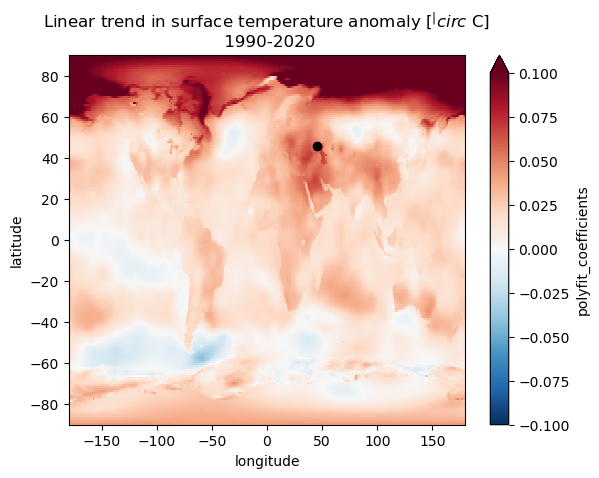

In [41]:
fit.polyfit_coefficients.sel(degree=1).plot(vmin=-0.1, vmax=0.1, cmap='RdBu_r')
plt.scatter(45.5, 45.5, c='k')
plt.title('Linear trend in surface temperature anomaly [$^|circ$ C] \n 1990-2020')
plt.show()

Let's test the fit data to see what that looks like at a point.

In [42]:
trend = fit.polyfit_coefficients.sel(degree=1) * present.time + fit.polyfit_coefficients.sel(degree=0)

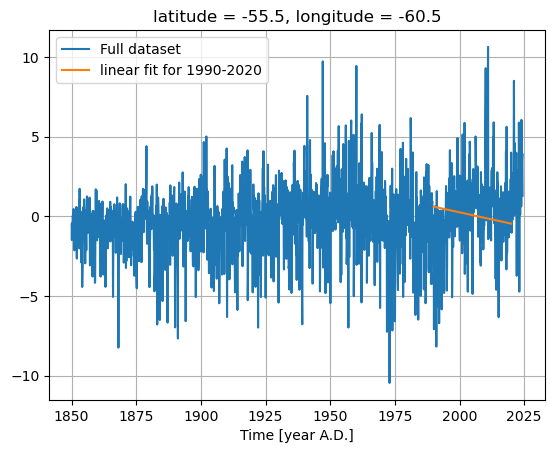

In [50]:
DS['temperature'].sel(latitude=55.5, longitude=-60.5).plot(label='Full dataset')
trend.sel(latitude=-55.5, longitude=-60.5).plot(label='linear fit for 1990-2020')
plt.grid()
plt.legend()
plt.show()

In [53]:
past = DS['temperature'].sel(times=slice(1900, 1930))
fit2 = past.polyfit('time', 1, full=True)

KeyError: "'times' is not a valid dimension or coordinate"

In [52]:
fit2.polyfit_coefficients.sel(degree=1).plot(vmin=-0.1, vmax=0.1, cmap='RdBu_r')
plt.show()

NameError: name 'fit2' is not defined